In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_states = gpd.read_file('/hpc/group/borsuklab/at341/celine_data/source_files/state_shapefiles/states.shp')
df_states = df_states[(df_states['STUSPS'] != 'AK') & (df_states['STUSPS'] != 'HI') & (df_states['STUSPS'] != 'VI') 
                      & (df_states['STUSPS'] != 'PR') & (df_states['STUSPS'] != 'MP') & (df_states['STUSPS'] != 'GU')
                     & (df_states['STUSPS'] != 'AS')]
df_states.rename(columns = {'NAME': 'state'}, inplace = True)
df_states = df_states[['state', 'STUSPS']]
df_states.head()

state STUSPS
0       Wyoming     WY
2      Maryland     MD
4      Arkansas     AR
5  North Dakota     ND
6      Delaware     DE

In [ ]:
df_tanks = gpd.read_file('/hpc/group/borsuklab/at341/celine_data/ast_master.shp')
df_tanks = df_tanks[['state', 'tank_type', 'county']]
df_tanks['county'] = df_tanks['county'].astype(str)
df_tanks['value'] = np.random.randint(50, 1000, df_tanks.shape[0])
df_tanks

state                tank_type county  value
0      New York         closed_roof_tank  36059    355
1      New York         closed_roof_tank  36059    519
2      New York         closed_roof_tank  36059    556
3      New York         closed_roof_tank  36059    711
4      New York         closed_roof_tank  36059    528
...         ...                      ...    ...    ...
98164  Colorado  narrow_closed_roof_tank  08031    812
98165  Colorado  narrow_closed_roof_tank  08031    924
98166  Colorado  narrow_closed_roof_tank  08031    698
98167  Colorado  narrow_closed_roof_tank  08031    927
98168  Colorado  narrow_closed_roof_tank  08031    561

[98169 rows x 4 columns]

In [5]:
# df_closed_roof = df_tanks[df_tanks['tank_type'] == 'closed_roof_tank']
# df_closed_roof = df_closed_roof.groupby(['state']).size().reset_index(name="frequency")
# df_closed_roof = df_closed_roof.merge(df_states)
# df_closed_roof.head()

state  frequency STUSPS
0     Alabama        747     AL
1     Arizona        355     AZ
2    Arkansas        785     AR
3  California       3611     CA
4    Colorado        556     CO

In [13]:
rows = 1
cols = 2
fig = make_subplots(
    rows=rows, cols=cols,
    specs = [[{'type': 'choropleth'}, {'type': 'choropleth'}]],
    subplot_titles = ['Closed Roof Tank', 'External Floating Roof Tank'])

In [21]:
cbarlocs_x = [.42, 0.96]
cbarlocs_y = [0.2, 0.8]
len = 0.5
fig.add_trace(go.Choroplethmapbox(geojson=counties, locations=df_tanks.county, z=df_tanks.value,
                                    colorscale="Viridis", zmin=0, zmax=1000,
                                    marker_opacity=0.5, marker_line_width=0), row=1, col = 1)

fig.add_trace(go.Choroplethmapbox(geojson=counties, locations=df_tanks.county, z=df_tanks.value,
                                    colorscale="Viridis", zmin=0, zmax=1000,
                                    marker_opacity=0.5, marker_line_width=0))

fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})

# fig.add_trace(go.Choropleth(
#     locations=df_narrow_closed['STUSPS'],
#     locationmode='USA-states',
#     z=df_narrow_closed['frequency'],
#     colorscale='viridis',
#     autocolorscale=False,
#     marker_line_color='white', # line markers between states
#     colorbar=dict(len=len, x=cbarlocs_x[0], y=cbarlocs_y[1])
# ), row = 2, col = 1)

# fig.add_trace(go.Choropleth(
#     locations=df_spherical['STUSPS'],
#     locationmode='USA-states',
#     z=df_spherical['frequency'],
#     colorscale='viridis',
#     autocolorscale=False,
#     marker_line_color='white', # line markers between states
#     colorbar=dict(len=len, x=cbarlocs_x[1], y=cbarlocs_y[1])
# ), row = 2, col = 2)

ValueError: Trace type 'choroplethmapbox' is not compatible with subplot type 'geo'
at grid position (1, 1)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

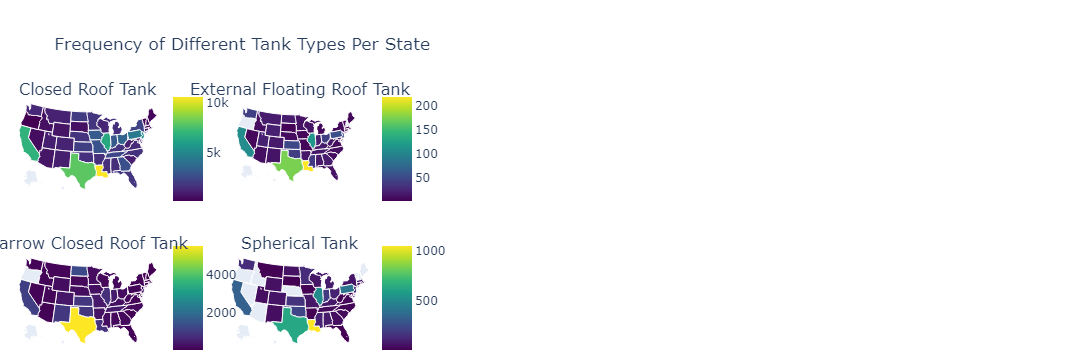

In [11]:
fig.update_layout(
    title_text = 'Frequency of Different Tank Types Per State',
    **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2,rows*cols+1).tolist()},
    )
fig.update_layout(margin=dict(l=1, r=700, t=100, b=1))
# fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
# change the size of text and colorbar
# save to a file
# make the colorbars more narrow
# make the tickmarks consistent (3), 2 may be fine
# switch to by county
# title should be in the center
# subplot title font size is smaller
# put columns colser together 
# make the colorbar closer to the map
fig.show()

In [12]:
df_counties = gpd.read_file('/hpc/group/borsuklab/at341/celine_data/source_files/county_shapefiles/counties.shp')
df_counties = df_counties[((df_counties['STATEFP'] != '02') & (df_counties['STATEFP'] != '15') &
                          (df_counties['STATEFP'] != '72') & (df_counties['STATEFP'] != '78') &
                          (df_counties['STATEFP'] != '60') & (df_counties['STATEFP'] != '66') &
                          (df_counties['STATEFP'] != '69'))]
df_counties = df_counties[['NAME', 'GEOID', 'geometry']]
df_counties.rename(columns = {'NAME': 'county', 'GEOID': 'geoid'}, inplace = True)
df_counties = df_counties[['county', 'geoid']]
df_counties.head()

county  geoid
0      Riley  20161
1   Ringgold  19159
2     Carbon  30009
3  Bear Lake  16007
4    Buffalo  55011

In [13]:
%%time
df_counties['values'] = np.random.randint(1, 1000, df_counties.shape[0])
df_counties

CPU times: user 1.09 ms, sys: 31 µs, total: 1.12 ms
Wall time: 1.05 ms


county  geoid  values
0         Riley  20161       7
1      Ringgold  19159     682
2        Carbon  30009     929
3     Bear Lake  16007     573
4       Buffalo  55011     860
...         ...    ...     ...
3229     Asotin  53003     413
3230    Candler  13043     677
3231  Tom Green  48451     847
3232    Licking  39089     577
3233   Woodbury  19193     836

[3108 rows x 3 columns]

In [14]:
# pip install plotly-geo

In [15]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

# df_sample = pd.file('/hpc/group/borsuklab/at341/celine_data/source_files/county_shapefiles/counties.shp')
# df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
# df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
# df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_counties['geoid'].tolist()
values = df_counties['values'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

TypeError: 'float' object is not callable

In [ ]:
rows = 1
cols = 2
fig_test = make_subplots(
    rows=rows, cols=cols,
    specs = [[{'type': 'choropleth'}, {'type': 'choropleth'}]],
    subplot_titles = ['Graph 1', 'Graph 2'])

In [ ]:
cbarlocs_x = [.42, 0.96]
cbarlocs_y = [0.2, 0.8]
len = 0.5

fig_test.add_trace(ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
), row = 1, col = 1)

In [ ]:
fig.update_layout(
    title_text = 'Frequency of Different Tank Types Per State',
    **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2,rows*cols+1).tolist()},
    )
fig.update_layout(margin=dict(l=1, r=700, t=100, b=1))
# fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
# change the size of text and colorbar
# save to a file
# make the colorbars more narrow
# make the tickmarks consistent (3), 2 may be fine
# switch to by county
# title should be in the center
# subplot title font size is smaller
# put columns colser together 
# make the colorbar closer to the map
fig.show()

In [ ]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()
values = df_sample['Unemployment Rate (%)'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

In [8]:
fig = go.Figure(data=go.Choropleth(
    locations=df_counties['county'],
    locationmode='USA-counties',
    z=df_counties['geoid'],
    colorscale='viridis',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
))

# fig = go.Figure(data=go.Choropleth(
#     locations=df_states['STUSPS'],
#     locationmode='USA-states',
#     z=df_states['GEOID'],
#     colorscale='Reds',
#     autocolorscale=False,
#     marker_line_color='white', # line markers between states
#     colorbar_title="Millions USD"
# ))

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'USA-counties'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']